<a href="https://colab.research.google.com/github/pikey-msc/AprendizMaquina/blob/main/2025-1/Regresion/Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf AprendizMaquina
!git clone 'https://github.com/pikey-msc/AprendizMaquina'
# !git clone 'https://github.com/pikey-msc/CursoDF'

Cloning into 'AprendizMaquina'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 129 (delta 10), reused 0 (delta 0), pack-reused 66
Receiving objects: 100% (129/129), 8.12 MiB | 23.22 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%load_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [ ]:
%%R
#Instalamos las bibliotecas que utilizaremos
# install.packages("MPDiR")    # Donde estan los datos Chromatic
# install.packages("dplyr")    # Para manipulación de datos
# install.packages("ggplot2")  # Para poder gráficar
# install.packages("lattice")  # Para poder graficar xyplot y condicionados
# install.packages("readxl")   # Para abrir archivos en excel
# install.packages("MASS")     # Para hacer regresiones de tipo binomial negativa
install.packages("caret")    # Permite evaluar los modelos de regresion
install.packages("plotly")   # Para hacer gráficos dinámicos
# install.packages("mlbench")  # Permite obtener los datos de Sonar
# install.packages("e1071")    # Solucion error caret
install.packages("caTools")  # Permite calcular el score AUC de la Curva ROC
install.packages("matlib")
# install.packages("aod")

# install.packages("psych")
# install.packages("boot")
# install.packages("GGally")


(as ‘lib’ is unspecified)

































































































































	‘/tmp/RtmpoQthDp/downloaded_packages’

(as ‘lib’ is unspecified)


































	‘/tmp/RtmpoQthDp/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/RtmpoQthDp/downloaded_packages’

(as ‘lib’ is unspecified)




















































































	‘/tmp/RtmpoQthDp/downloaded_packages’



In [ ]:
%%R
# library(MPDiR)    # Donde estan los datos Chromatic
library(dplyr)    # Para manipulación de datos
library(ggplot2)  # Para poder gráficar
library(lattice)  # Para poder graficar xyplot y condicionados
library(readxl)   # Para abrir archivos en excel
library(MASS)     # Para hacer regresiones de tipo binomial negativa
library(caret)
library(caret)    # Permite evaluar los modelos de regresion
library(plotly)   # Para hacer gráficos dinámicos
# library(mlbench)  # Permite obtener los datos de Sonar
library(e1071)    # Solucion error caret
library(caTools)  # Permite calcular el score AUC de la Curva ROC
library(matlib)
# library(aod)
# library(sampling)
# library(psych)
# library(boot)
# library(GGally)

## Regresión lineal

En el análisis de regresión lineal múltiple se utiliza más de una variable explicativa, se busca definir que, del conjunto de variables, cuales son las que más influyen. Los valores de la variable dependiente $Y$ se generan a partir de una combinación lineal de los valores de una o más variables explicativas y un término aleatorio
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k + u$
Los coeficientes son elegidos de forma que la suma de cuadrados entre los valores observados y los pronosticados sea mínima, es decir, que se va a minimizar la varianza residual.

En la práctica se debe elegir cuidadosamente las variables que se consideraran como explicativas. Algunos criterios que deben de cumplir son los siguientes:

*   Tener sentido numérico
*   Evitar variables repetidas o redundantes

*   Justificación teórica
*   La relación entre variables explicativas en el modelo y casos debe de ser como mínimo de 1 a 10

*   La relación de las variables explicativas con la variable dependiente debe de ser lineal, es decir, proporcional

El modelo de regresión múltiple debe cumplir con las siguientes hipótesis:


1.   Linealidad: Los valores de la variable dependiente están generados por el siguiente modelo lineal: $Y=X \beta +U$
2.   Homocedasticidad: Las perturbaciones tienen la misma varianza $V(u_i)=\sigma^2$

1.   Independencia: Las perturbaciones aleatorias son independientes entre sí.
2.   Normalidad: La distribución de la perturbación aleatoria es normal
1.   Las variables explicativas $X_k$ se obtienen son errores de medida







# Fundamentos de la Regresión Lineal

## 1. Función de Pérdida de Mínimos Cuadrados

En regresión lineal, la **función de pérdida** más común es la **suma de los errores al cuadrado** (OLS, por sus siglas en inglés "Ordinary Least Squares"). El objetivo es minimizar la **diferencia entre las predicciones del modelo y los valores observados**.

La función de pérdida se expresa como:

$$
L(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip}))^2
$$

Donde:
- $y_i$ son los valores observados,
- $\hat{y}_i$ son las predicciones del modelo,
- $\beta_0, \beta_1, ..., \beta_p$ son los coeficientes del modelo,
- $x_{i1}, x_{i2}, ..., x_{ip}$ son los valores de las variables predictoras.

El objetivo es encontrar los coeficientes $\beta_0, \beta_1, ..., \beta_p$ que minimicen la suma de los cuadrados de los errores (residuos).

## 2. Estimador de los Coeficientes

Los coeficientes $\beta_0, \beta_1, ..., \beta_p$ de la regresión lineal se pueden estimar mediante **mínimos cuadrados ordinarios**. El estimador de los coeficientes es:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

Donde:
- $X$ es la matriz de características (con una columna de unos para el intercepto),
- $y$ es el vector de las observaciones,
- $\hat{\beta}$ es el vector de coeficientes estimados.

Este es un resultado directo derivado de minimizar la función de pérdida.

## 3. Distribución de los Coeficientes

Cuando se asume que los errores $\epsilon_i$ (es decir, la diferencia entre las observaciones y las predicciones) siguen una distribución normal con media cero y varianza constante $\sigma^2$, los coeficientes estimados $\hat{\beta}$ son **insesgados** y **eficientes**. La distribución de los coeficientes estimados es:

$$
\hat{\beta} \sim N(\beta, \sigma^2 (X^T X)^{-1})
$$

Esto significa que, bajo estas condiciones, los estimadores de los coeficientes siguen una distribución normal con una media igual al valor real de los coeficientes $\beta$ y una varianza que depende de la matriz $(X^T X)^{-1}$.

## 4. Pruebas de Hipótesis Comunes

En regresión lineal, es común realizar pruebas de hipótesis para evaluar la significancia de los coeficientes estimados. Aquí te presento algunas de las más comunes:

### a. Prueba de Significancia Individual (Prueba t)

Se utiliza para evaluar si un coeficiente estimado $\hat{\beta_j}$ es significativamente diferente de cero. La hipótesis nula es:

$$
H_0: \beta_j = 0
$$

Contra la hipótesis alternativa:

$$
H_a: \beta_j \neq 0
$$

La estadística de prueba es:

$$
t_j = \frac{\hat{\beta_j}}{SE(\hat{\beta_j})}
$$

Donde $SE(\hat{\beta_j})$ es el error estándar de $\hat{\beta_j}$. Si el valor p asociado a esta prueba es menor que el nivel de significancia (por ejemplo, 0.05), se rechaza $H_0$, indicando que el predictor es significativo.

### b. Prueba F Global (Prueba de la Significancia Global del Modelo)

La prueba F se utiliza para probar la hipótesis de que **todos los coeficientes del modelo** son cero (es decir, que las variables predictoras no tienen ningún poder explicativo). La hipótesis nula es:

$$
H_0: \beta_1 = \beta_2 = \dots = \beta_p = 0
$$

Contra la hipótesis alternativa:

$$
H_a: \text{Al menos un } \beta_j \neq 0
$$

La estadística de prueba F es:

$$
F = \frac{\text{Variabilidad explicada}}{\text{Variabilidad no explicada}} = \frac{\frac{RSS_0 - RSS_1}{p}}{\frac{RSS_1}{n-p-1}}
$$

Donde:
- $RSS_0$ es la suma de los cuadrados de los residuos del modelo sin variables predictoras,
- $RSS_1$ es la suma de los cuadrados de los residuos del modelo ajustado,
- $n$ es el número de observaciones,
- $p$ es el número de variables predictoras.

Si el valor p de la prueba F es pequeño, se puede concluir que al menos una de las variables predictoras es


### Ejemplo Regresión 1

Leemos el dataset con el que se generará el modelo lineal

In [ ]:
%%R
data<-read.csv('/content/AprendizMaquina/2023-1/Regresion/Datos/ventas.csv')
str(data)
summary(data)

'data.frame':	22 obs. of  3 variables:
 $ ventas  : int  973 1119 875 625 910 971 931 1177 882 982 ...
 $ tv      : int  10 10 25 25 30 30 35 35 40 40 ...
 $ internet: int  40 40 25 25 30 30 35 35 25 25 ...
     ventas           tv           internet    
 Min.   : 625   Min.   :10.00   Min.   :10.00  
 1st Qu.: 941   1st Qu.:31.25   1st Qu.:25.00  
 Median :1148   Median :45.00   Median :30.00  
 Mean   :1225   Mean   :44.09   Mean   :30.91  
 3rd Qu.:1500   3rd Qu.:58.75   3rd Qu.:38.75  
 Max.   :1866   Max.   :70.00   Max.   :45.00  


Leer el conjunto de datos con Python

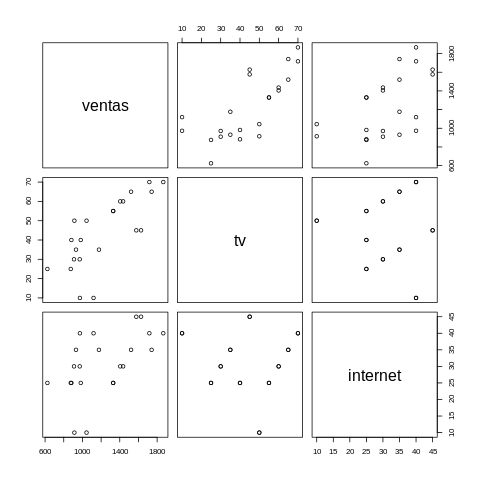

In [ ]:
%%R
plot(data)

Graficar la dispersión con Python

La prueba de hipótesis es:

*   Hipótesis nula: Coeficientes $\beta_i=0$
*   Hipótesis alternativa: Coeficientes $\beta_i \neq 0$





In [ ]:
%%R
modelo<-lm(ventas~.,data = data)
summary(modelo)


Call:
lm(formula = ventas ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-245.72  -78.50   20.10   66.06  207.80 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -84.541    111.806  -0.756    0.459    
tv            14.857      1.464  10.146 4.16e-09 ***
internet      21.179      2.759   7.676 3.08e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 119.6 on 19 degrees of freedom
Multiple R-squared:  0.8916,	Adjusted R-squared:  0.8802 
F-statistic: 78.15 on 2 and 19 DF,  p-value: 6.797e-10



F-statistic es 78.5, significa que nuestro modelo tiene un mejor ajuste que un modelo con coeficientes B=0. Podemos rechazar la hipótesis nula.

In [ ]:
%%R
e<-data$ventas-modelo$fitted.values


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.97491, p-value = 0.8209



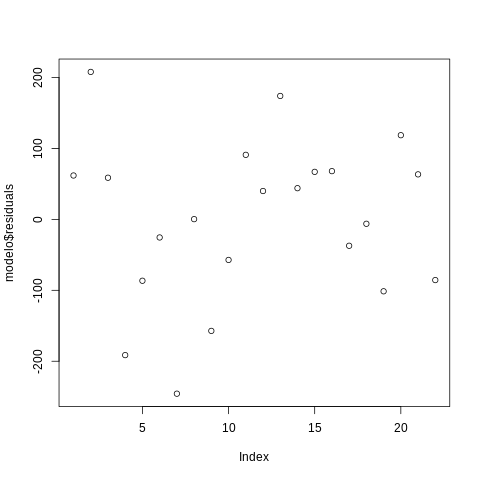

In [ ]:
%%R
print(shapiro.test(modelo$residuals))
plot(modelo$residuals)

De la prueba, el p-value > 0.05 implica que la distribución del error no tiene diferencia significativa con una distribución normal.

Ajustar la regresión con Python (usar scikit learn)

Usar Shapiro test con Python

Ahora se mostrará cómo comprobar los resultados de nuestro modelo

'data.frame':	31 obs. of  5 variables:
 $ temperatura: num  36.3 35.8 36.4 37.5 35.6 35 37.3 36 37.3 38 ...
 $ glucosa    : int  81 85 93 93 99 76 75 84 78 84 ...
 $ peso       : int  84 73 65 70 76 69 63 72 79 75 ...
 $ edad       : int  46 20 52 30 57 25 28 36 57 44 ...
 $ grasa      : int  354 190 405 263 451 302 288 385 402 365 ...

Call:
lm(formula = grasa ~ edad, data = datos_regre)

Residuals:
     Min       1Q   Median       3Q      Max 
-108.286  -31.928   -4.251   25.353  102.204 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 153.9908    32.8804   4.683 6.11e-05 ***
edad          4.0877     0.8124   5.032 2.32e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53 on 29 degrees of freedom
Multiple R-squared:  0.4661,	Adjusted R-squared:  0.4477 
F-statistic: 25.32 on 1 and 29 DF,  p-value: 2.322e-05



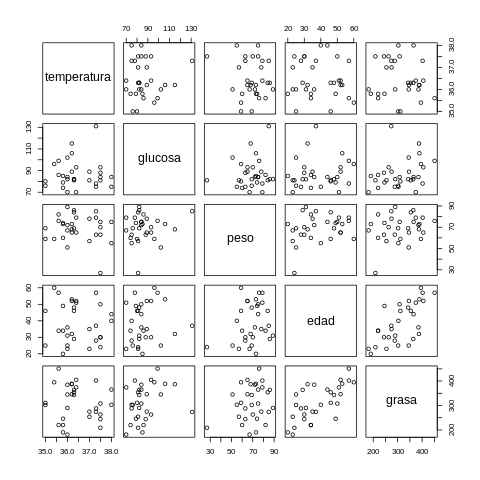

In [ ]:
%%R
datos_regre<-read.csv("/content/AprendizMaquina/2023-1/Regresion/Datos/datos3.csv", header = T)

str(datos_regre)

pairs(datos_regre)#Graficamos la relación entre las variables

cor(datos_regre)#Matriz de correlaciones

regresion1<- lm(grasa~edad, data = datos_regre)
summary(regresion1)

Ajustar la regresión sin usar paquetería en R

In [ ]:
%%R
XI=cbind(matrix(1,nrow(datos_regre),1),datos_regre$edad)
YI=datos_regre$grasa


BI=solve(t(XI)%*%XI)%*%t(t(YI)%*%XI)

EI=YI-t(t(BI)%*%t(XI))
EI2=EI*EI
dfe=nrow(XI)-nrow(BI)
stderrI=sqrt(diag(solve(t(XI)%*%XI))*(sum(EI2)/dfe)) #DESVIACIÓN DE LOS ESTIMADORES
tI=t(BI)/stderrI  #VALOR T DE ESTIMADORES
pvtI=(1-pt(abs(tI),dfe))*2  #p-value de los estimadores
emy=t(YI-mean(YI))%*%(YI-mean(YI))
Esr=sqrt(sum(EI2)/dfe)  #error estándar residual
Rsq=(emy-sum(EI2))/emy #R-cuadrada
Rsqadj=1-(1-Rsq)*((nrow(XI)-1)/(dfe)) ##R-cuadrada ajustada (OJO, si el modelo no tiene "intercept" hay que restarle uno a "dfe")
Ft=Rsq/(1-Rsq)*(dfe/(nrow(BI)-1)) #estadístico F
pvF=1-pf(Ft,(nrow(BI)-1),dfe)

parms=t(rbind(t(BI),stderrI,tI,pvtI))
colnames(parms)=c("Estimadores","Error estándar", "Valor t", "P(>|t|)")
stats=c(Esr,Rsq,Rsqadj,Ft,pvF)
names(stats)=c("Err est","R2", "R2-ajustada", "Est. F", "p-value F")
print(parms)
print(stats)

     Estimadores Error estándar  Valor t      P(>|t|)
[1,]  153.990783     32.8804411 4.683355 6.111702e-05
[2,]    4.087665      0.8123642 5.031814 2.321936e-05
     Err est           R2  R2-ajustada       Est. F    p-value F 
5.299663e+01 4.661183e-01 4.477086e-01 2.531915e+01 2.321936e-05 


Ajustar la regresión sin usar paquetería en Python

### Ejemplo Regresión 2

In [ ]:
%%R
insurance<-read.csv("/content/AprendizMaquina/2023-1/Regresion/Datos/insurance.csv")
str(insurance)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


Leer datos con Python

Analizar variable respuesta en R

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 


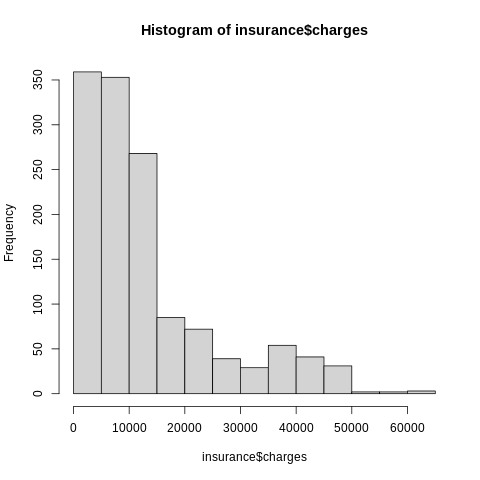

In [ ]:
%%R
#Analizamos nuestra variable de respuesta
print(summary(insurance$charges))
hist(insurance$charges)


Analizar variable respuesta en Python

Correlación en R

In [ ]:
%%R
cor(insurance[c("age", "bmi", "children", "charges")])

               age       bmi   children    charges
age      1.0000000 0.1092719 0.04246900 0.29900819
bmi      0.1092719 1.0000000 0.01275890 0.19834097
children 0.0424690 0.0127589 1.00000000 0.06799823
charges  0.2990082 0.1983410 0.06799823 1.00000000


Correlación en Python

Gráfico de dispersión en R

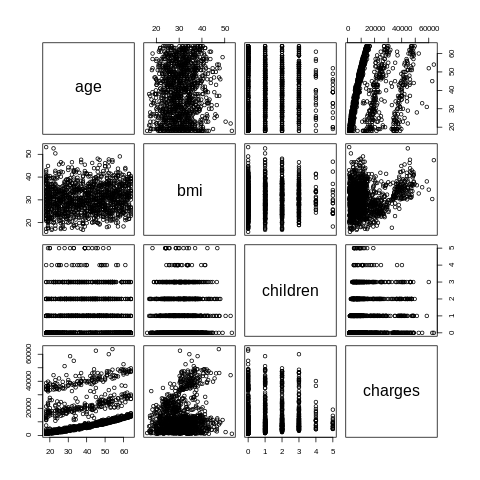

In [ ]:
%%R
pairs(insurance[c("age", "bmi", "children", "charges")])

In [ ]:
%%R
pairs.panels(insurance[c("age", "bmi", "children", "charges")])

  could not find function "pairs.panels"




Error in pairs.panels(insurance[c("age", "bmi", "children", "charges")]) : 
  could not find function "pairs.panels"


RInterpreterError: ignored

Gráfico de dispersión en Python

Ajuste de modelo, resultados y análisis de residuales en R

In [ ]:
%%R
ins_model <- lm(charges ~ ., data = insurance)

In [ ]:
%%R
summary(ins_model)


Call:
lm(formula = charges ~ ., data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
sexmale           -131.3      332.9  -0.394 0.693348    
bmi                339.2       28.6  11.860  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1329 DF,  p-value: < 2.2e-16



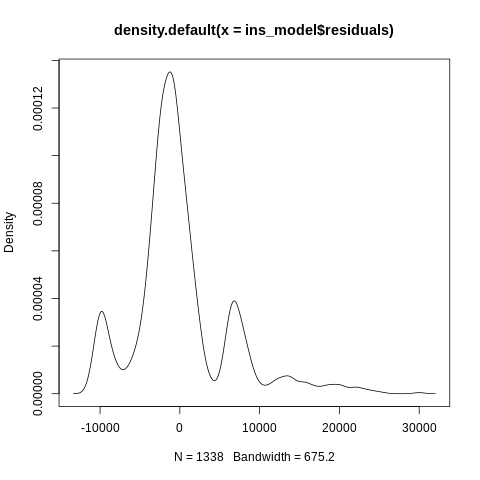

In [ ]:
%%R
d<-density(ins_model$residuals)
plot(d)


	Shapiro-Wilk normality test

data:  ins_model$residuals
W = 0.89894, p-value < 2.2e-16



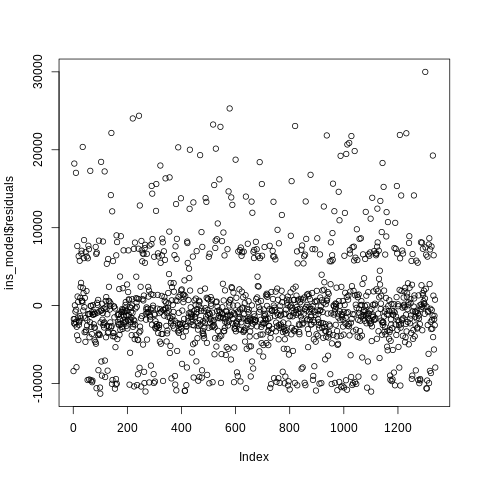

In [ ]:
%%R
print(shapiro.test(ins_model$residuals))
plot(ins_model$residuals)

Ajuste de modelo, resultados y análisis de residuales en Python

ANOVA en R

In [ ]:
%%R
anova(ins_model)

Analysis of Variance Table

Response: charges
            Df     Sum Sq    Mean Sq   F value    Pr(>F)    
age          1 1.7530e+10 1.7530e+10  477.0239 < 2.2e-16 ***
sex          1 7.9167e+08 7.9167e+08   21.5425 3.803e-06 ***
bmi          1 5.2576e+09 5.2576e+09  143.0687 < 2.2e-16 ***
children     1 5.5111e+08 5.5111e+08   14.9966 0.0001129 ***
smoker       1 1.2287e+11 1.2287e+11 3343.5022 < 2.2e-16 ***
region       3 2.3343e+08 7.7810e+07    2.1173 0.0962211 .  
Residuals 1329 4.8840e+10 3.6749e+07                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




*   Residuals: Summary de las estadísticas de nuestro error
*   Estrellas: Significancia de la variable

*   Multiple r-squared: Coeficiente de determinación, mientras m´s cercano a 1, mejor describe a la variable dependiente
*   F ó ($\frac{SSR}{SSE}$): Entre más grande sea significa que los valores de $\beta_i$ describen mejor al modelo





ANOVA en Python

## Modelo lineal generalizado

Cuando la estadística decriptiva de los datos Y no sigue una tendencia lineal y la varianza de Y depende de la media se usan los Modelo Lineales Generalizados (**LGM**)

Un GLM está compuesto por un predictor lineal
$n_i=B_0 + B_1x_1 i+...+B_p x_p i $

Y dos funciones:

La función liga que describe la dependencia que existe entre la media y el predictor lineal

 $E[Y_i]=M_i$

 $g(M_i)=\eta_i$

La funcion de la varianza que describe la relacion entre la varianza sobre la media

$Var(y_i)=\phi V(M) $

La mayoria de las distribuciones mas utilizadas son miembros de la familia de distribucion exponencial (Ejemplo: Normal, Binomial o Poisson)

Las funciones de la familia exponencial disponibles en R son:

 - binomial(link = "logit")

 - gaussian(link = "identity")

 - Gamma(link = "inverse")

 - inverse.gaussian(link = "1/mu2")

 - poisson(link = "log")


### Metricas importantes de los Modelos de Regresión

- Akaike Information Criterion

- Deviance

- Root Mean Squared Error

- Confusion Matrix


#### Akaike Information Criterion

$AIC = 2k - 2ln(L)$

donde:

$L=p(x|\theta,M)$



*   $L$ es el valor maximizado de la función de verosimilitud
*   $x$ son los valores observados

*   $k$ es el número de parámetros del modelo

Consideraciones importantes:


*   Cuando se evaluan dos modelos con la misma información y las mismas variables respuestas el modelo con **MENOR AIC** es considerado mejor.
*   Entre mas complejo sea el modelo (mayor cantidad de parámetros k), mayor sera la posibilidad de que el AIC sea mayor

*   El indicador **AIC NO** indica la si la calidad del modelo es buena. Si ambos modelos candidatos se ajustan pobremente, el indicador AIC no generara una alerta de ello



#### Deviance

Se utiliza para medir la calidad de ajuste estadístico.

$D(y)=−2(log(p(y|θ0))−log(p(y|θs)))$

La Devianza Residual mide la diferencia que existe entre el Modelo Saturado y el modelo Propuesto.

La Devianza Nula mide la diferencia que existe entre el Modelo Saturado y el modelo Nulo

Se considera que un buen modelo es aquel cuya diferencia es CERCANA A CERO tanto para la Devianza Residual como para la Devianza Nula

Si la Deviaza en ambos casos es igual a cero se considera que el ajuste es perfecto. Si la Devianza es mayor a cero se dice que existe “Sobre-dispersión”

El modelo Saturado asume que cada punto tiene sus propios parametros (lo que significa que tiene n parametros)

El modelo Nulo asume exactamente lo contrario, un solo parametro para todos los puntos, por lo que solo se estima un parametro.

El modelo Propuesto asume que los puntos son modelados mediante p parametros mas un término de intercepción, por tanto que tiene $p + 1$ parámetros.


#### RMSE (Root Mean Squared Error)

$RMSE = \sqrt{\frac1n\sum_{i=1}^n(\hat{y}-y)^2}$

Donde:

$\hat{y}$ es la variable predecida

$y$ es la variable real

Tener un $RMSE = 0 $ es ideal pero no es posible en la mayoría de las situaciones. Un $RMSE = 0$ significa que el estimador predice las observaciones con una precisión perfecta.
La validación cruzada corresponde a repetir n veces el calculo del $RMSE$ al separar de manera aleatoria n veces los datos en train y test.

#### Matriz de confusión

La matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

Indicadores:

Accuracy: Que tan seguido la clasificación es correcta.

$\frac{TP+TN}{Total}$

Error Rate: Proporción de clasificados incorrectamente

$\frac{FP+FN}{Total}=1-accuracy$

True Positive Rate: Que tan seguido la predicción es Positiva

$\frac{TP}{TotalP}$

False Positive Rate: Que tan seguido la predicción es Negativa

$\frac{FP}{TotalF}$

Specificity: Que tan seguido la clasificación y la predicción es Negativa

$1−\frac{FP}{TotalF}$

Null Error Rate: Que tan seguido la clasificación es incorrecta

$\frac{TN+FP}{Total}$

Recall: Capacidad deidentificar verdaderos positivos

$\frac{TP}{TP+FN}$

$\kappa$: Dependiendo de el uso que vaya a tener el modelo, la interpretación del estadístico $\kappa$ puede variar. Una interpretación sería:

• Poor agreement = Less than 0.20

• Fair agreement = 0.20 to 0.40

• Moderate agreement = 0.40 to 0.60

• Good agreement = 0.60 to 0.80

• Very good agreement = 0.80 to 1.00




Ejemplo de *Matriz de Confuisión*


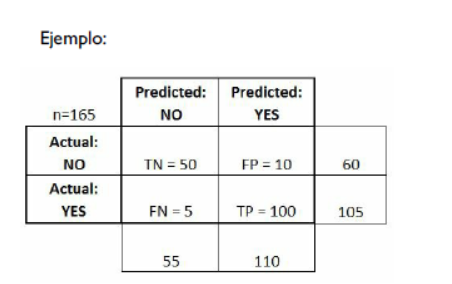

#### CURVA ROC
El análisis de la curva ROC, proporciona herramientas para seleccionar los modelos posiblemente óptimos y descartar modelos subóptimos.

Para dibujar una curva ROC sólo son necesarias las razones de True Positive Rate (TP) y de False Positive Rate (FP).

El mejor método posible de predicción se situaría en un punto en la esquina superior izquierda, o coordenada (0,1) del espacio ROC, representando un 100% de sensibilidad (ningún falso negativo) y un 100% también de especificidad (ningún falso positivo). A este punto (0,1) también se le llama una clasificación perfecta.

Los siguientes datos obtenidos en Zuur, Ieno y Hilbe [Zuur AF, Hilbe JM and Ieno EN, Beginner’s Guide to GLM and GLMM with R (2013). Springer Science Business Media New York 2007] mide la abundancia de peces a distintas profundidades, en dos periodos temporales (1979-1989 vs 1997-2002) en Atlántico noroeste. Durante el segundo periodo se desarrollo mucho la actividad pesquera comercial, que se sospecha tuvo impacto en las comunidades oceanicas. Examinaremos si la relación entre la riqueza y la profundidad ha cambiado de la base Baileyetal2008.xls

Son 148 registros en donde se indica la abundancia de peces (# de peces), la densidad, la profundidad promedio, el año, el periodo a que corresponde, las coordenadas X y Y en Km y el área de captura

### MLG para datos binarios

¿Por qué no usar regresión lineal cuando la salida es binaria $\{0,1\}$?

* El error $e$ ya no será una variable aleatoria continua (como ocurría en el los modelos lineales de regresión múltiple (MLRM)), sino que será una variable aleatoria discreta, puesto que, conocidos los valores de las variables explicativas, $e$ sólo puede tomar dos valores determinados. Por tanto, $e$ ya no se distribuirá de forma normal (uno de los supuestos básicos del MRLM). Si bien este supuesto no resulta estrictamente
necesario para aplicar mínimos cuadrados ordinarios (MCO), sí es fundamental a la hora de realizar cualquier tipo de
inferencia posterior sobre el modelo (intervalos de confianza para los parámetros estimados, contrastes de hipótesis, etc.).
* El término de perturbación no cumple la hipótesis de homoscedasticidad (la varianza de dicho término no es constante). Esto se da por que $Var(Y|X_1,\ldots,X_m)=P(Y=1|X_1,\ldots,X_m)[1-P(Y=1|X_1,\ldots,X_m)]$ varía para cada observación $i$ de la muestra. Debido a este problema, MCO no serán eficientes, por lo que resultará necesario recurrir a la estimación por mínimos cuadrados generalizados (MCG).
* Se corre el riesgo de predecir valores de $Y$  menores que 0 y mayores que 1.
\item Finalmente, la expresión $P(Y=1|X_1,\ldots,X_m)=\beta_0+\beta_1X_1+\ldots+\beta_m X_m$ nos dice que la
probabilidad del suceso de ``éxito" viene determinada por una combinación lineal de variables. De ello se deduce que la variación en $P(Y = 1|X_1,\ldots,X_m)$ causada por cambios en alguna de las variables explicativas es constante (y, por tanto, independiente del valor actual de dicha variable explicativa), lo cual es una hipótesis muy poco realista, pues si se perturba la variable $X_i$, digamos $X_i'$, entonces la variación viene dada por :

\begin{align*}
    \frac{\delta P(Y=1|X_1,\ldots,X_m)}{\delta X_i}&= \frac{P(Y=1|X_1,\ldots X_i,\ldots ,X_m)-P(Y=1|X_1,\ldots X'_i,\ldots ,X_m)}{X_i - X_i'}\\
    &= \frac{[\beta_0+ \ldots+ \beta_i X_i + \ldots + \beta_m X_m]-[\beta_0+\ldots+ \beta_i X'_i + \ldots + \beta_m X_m]}{X_i - X_i'}\\
    &= \frac{ \beta_i [X_i -  X'_i] }{X_i - X_i'}\\
    &= \beta_i
\end{align*}


Para evitar las inconsistencias anteriores se han desarrollado modelos no lineales, los cuales tratan de resolver los problemas anteriores.
La idea consiste utilizar un modelo de la forma
$$Y=f(\beta_0+\beta_1X_1+\ldots+\beta_m X_m)+ e,$$
donde $f$ es la función real que depende de la expresión lineal $\beta_0+\beta_1X_1+\ldots+\beta_m X_m$.
Con el nuevo modelo, y razonando de forma similar al caso del modelo lineal, se cumplirá:
$$E[Y|X_1,\ldots,X_m]=P(Y=1|X_1,\ldots,X_m)=f(\beta_1+\beta_1X_1+\ldots+\beta_m X_m).$$
Ahora bien, ¿qué tipo de función f estamos buscando?: obviamente, $f$ deberá ser distinta de la
función identidad (para evitar los problemas 3 y 4). La clase de funciones no decrecientes, acotadas entre cero y uno, es la clase de las funciones de distribución, por lo que el problema se resuelve tomando como $f$ cualquier

#### Logit

$$Y=f(\beta_0+\beta_1X_1+\ldots+\beta_m X_m)+ e,$$
donde $f$ es la función logística, es decir:
$$f(z)=\frac{\exp(z)}{1+\exp(z)}=\frac{1}{1+\exp(-z)}.$$

##### Ejemplo 1 Logit

In [ ]:
%%R

incump="/content/AprendizMaquina/2023-1/Regresion/Datos/base_inc.csv"

data=read.csv(incump, sep=",", quote="/")

print(head(data))

colors <- c("red", "blue", "darkgreen", "gold", "black")
attach(data)
n<-nrow(data)-1
m=ncol(data)
x=data[,3:m]
y=data[,2]
ylogr = glm(y ~  Liquid  +  Apalanc  +  AscCl  +    Rentab  +Bancos  +  PCP_CT   +  Gop_SD + RetrTMP  +  PLP_PT + IFAudit  +UO_VN + AnOper , family=binomial("logit"))
print(ylogr)
xext=as.matrix(cbind(1,x))
print(head(xext))
summary(ylogr)


  Cliente Incump   Liquid   Apalanc    AscCl       Rentab Bancos    PCP_CT
1       1      0 1.418983 0.3678430 5.519115  0.082436996      2 0.9578792
2       2      0 1.095459 0.6742535 5.365984  0.050120498      3 0.7856872
3       3      0 1.232216 0.8788182 6.579059  0.047376582      1 0.6682592
4       4      0 1.112399 0.6111619 3.980561 -0.010216081      2 0.9324931
5       5      0 1.495808 0.2262790 5.861760  0.002987486      4 0.5764472
6       6      0 1.106524 0.7106344 6.710337  0.046598640      3 0.7644960
     Gop_SD RetrTMP    PLP_PT IFAudit      UO_VN AnOper
1 0.9619346       1 0.4255506       1 0.16267763      4
2 0.8832112       1 0.3777689       0 0.20572504      4
3 1.1103575       1 0.5652263       0 0.23805917      4
4 1.0153539       1 0.3970641       1 0.17857237      5
5 0.9057852       1 0.4313102       0 0.08164283      6
6 1.0523312       0 0.3734093       1 0.24602347      4

Call:  glm(formula = y ~ Liquid + Apalanc + AscCl + Rentab + Bancos + 
    PCP_CT 

In [ ]:
%%R
#Réplica de Devianza
print(ylogr$coef)
Llogit=log(prod(((1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1))^y*(1-(1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1))^(1-y)))
DLogit=-2*Llogit
print(DLogit)

print(ylogr$dev)


(Intercept)      Liquid     Apalanc       AscCl      Rentab      Bancos 
  86.096523  -35.347612   63.663052   -7.861229 -395.215718    8.518809 
     PCP_CT      Gop_SD     RetrTMP      PLP_PT     IFAudit       UO_VN 
  47.308495  -73.760760   -9.272432 -102.053079   16.038037 -124.528160 
     AnOper 
  -3.374335 
[1] 1.310612e-08
[1] 1.310611e-08


[1] "Matriz de confusión"
   
y     0   1
  0 126   0
  1   0 121


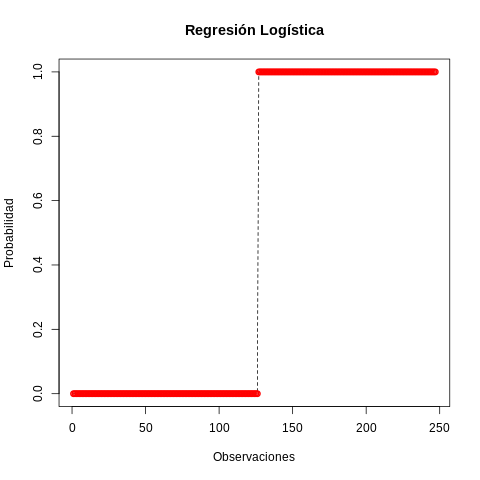

In [ ]:
%%R

ptol=0.5
yest=(1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1)

#print(confusionMatrix(as.factor(y), as.factor(ylogr$fit)))
#matriz de confusión
print("Matriz de confusión")
print(table(y,ifelse(yest<0.5,0,1)))

plot(y,type="l", lty=2, xlab="Observaciones",
  ylab="Probabilidad", main="Regresión Logística")
points(yest, lwd=2, col=colors[1])



###### Ejercicio 1 Logit en Python

##### Ejemplo 2 R Logit

In [ ]:
%%R
#A researcher is interested in how variables, such as GRE (Graduate Record Exam scores), GPA (grade point average)
#and prestige of the undergraduate institution, effect admission into graduate school.
#The response variable, admit/don’t admit, is a binary variable

data<- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
print(head(data))
print(summary(data))
print(sapply(data, sd))

print(xtabs(~admit + rank, data = data))
data$rank <- factor(data$rank)
mylogit <- glm(admit ~ gre + gpa + rank, data = data, family = binomial("logit"))
summary(mylogit)
print(confint(mylogit))


  admit gre  gpa rank
1     0 380 3.61    3
2     1 660 3.67    3
3     1 800 4.00    1
4     1 640 3.19    4
5     0 520 2.93    4
6     1 760 3.00    2
     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  
      admit         gre         gpa        rank 
  0.4660867 115.5165364   0.3805668   0.9444602 
     rank
admit  1  2  3  4
    0 28 97 93 55
    1 33 54 28 12
                    2.5 %       97.5 %
(Intercept) -6.2716202334 -1.792547080
gre          0.0001375921  0.004435874
gpa          0.1602959439  1.464142727
rank2       -1.3008888002 -0.056745722
rank3       -2.0276713127 -

In [ ]:
%%R
wald.test(b = coef(mylogit), Sigma = vcov(mylogit), Terms = 4:6)

Wald test:
----------

Chi-squared test:
X2 = 20.9, df = 3, P(> X2) = 0.00011


In [ ]:
%%R
## odds ratios and 95% CI
exp(cbind(OR = coef(mylogit), confint(mylogit)))

                   OR       2.5 %    97.5 %
(Intercept) 0.0185001 0.001889165 0.1665354
gre         1.0022670 1.000137602 1.0044457
gpa         2.2345448 1.173858216 4.3238349
rank2       0.5089310 0.272289674 0.9448343
rank3       0.2617923 0.131641717 0.5115181
rank4       0.2119375 0.090715546 0.4706961


###### Ejercicio 2 Python Logit

####Probit


Otra posible solución a las inconsistencias que presentaba el modelo de probabilidad lineal - para explicar el comportamiento de una variable dependiente binaria- es usar un modelo Probit (también llamado modelo Normit) de la forma:
$$Y=f(\beta_0+\beta_1X_1+\ldots+\beta_mX_m)+e,$$
$f$ es la función de distribución de una normal estándar, es decir
$$f(z)=\int_{-\infty}^z\frac{\exp(-t^2/2)}{\sqrt{2\pi}}dt.$$
Por lo tanto tenemos que
$$E[Y|X_1,\ldots,X_m]=P(Y=1|X_1,\ldots,X_m)=\int_{-\infty}^{\beta_0+\beta_1X_1+\ldots+\beta_mX_m}\frac{\exp(-t^2/2)}{\sqrt{2\pi}}dt.$$

##### Ejemplo 1 Probit R

In [ ]:
%%R
yprobr <- glm(y ~  Liquid  +  Apalanc  +  AscCl  +    Rentab  +Bancos  +  PCP_CT   +  Gop_SD + RetrTMP  +  PLP_PT + IFAudit  +UO_VN + AnOper, family=binomial("probit"))
yprobr
summary(yprobr)


Call:
glm(formula = y ~ Liquid + Apalanc + AscCl + Rentab + Bancos + 
    PCP_CT + Gop_SD + RetrTMP + PLP_PT + IFAudit + UO_VN + AnOper, 
    family = binomial("probit"))

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.926e-05  -2.100e-08  -2.100e-08   2.100e-08   4.848e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  2.471e+01  9.547e+04   0.000    1.000
Liquid      -1.026e+01  2.310e+04   0.000    1.000
Apalanc      1.835e+01  2.157e+04   0.001    0.999
AscCl       -2.292e+00  5.684e+03   0.000    1.000
Rentab      -1.131e+02  2.929e+05   0.000    1.000
Bancos       2.413e+00  1.575e+04   0.000    1.000
PCP_CT       1.390e+01  3.383e+04   0.000    1.000
Gop_SD      -2.059e+01  3.389e+04  -0.001    1.000
RetrTMP     -2.470e+00  3.524e+04   0.000    1.000
PLP_PT      -2.985e+01  1.296e+05   0.000    1.000
IFAudit      4.724e+00  8.143e+03   0.001    1.000
UO_VN       -3.906e+01  2.158e+05   0.000    1.000
AnOper

In [ ]:
%%R
#Comprobación de devianza
print(yprobr$coef)
Lprobit=log(prod((pnorm(xext%*%as.matrix(yprobr$coef),0,1))^y*(1-pnorm(xext%*%as.matrix(yprobr$coef),0,1))^(1-y)))
Dprobit=-2*Lprobit

print(Dprobit)
print(yprobr$dev)


 (Intercept)       Liquid      Apalanc        AscCl       Rentab       Bancos 
  24.7127629  -10.2636723   18.3518939   -2.2920938 -113.1226201    2.4129901 
      PCP_CT       Gop_SD      RetrTMP       PLP_PT      IFAudit        UO_VN 
  13.9003856  -20.5925049   -2.4704686  -29.8456574    4.7245225  -39.0648941 
      AnOper 
  -0.9761072 
[1] 1.276503e-08
[1] 1.276513e-08


[1] "Matriz de confusión"
   
y     0   1
  0 126   0
  1   0 121


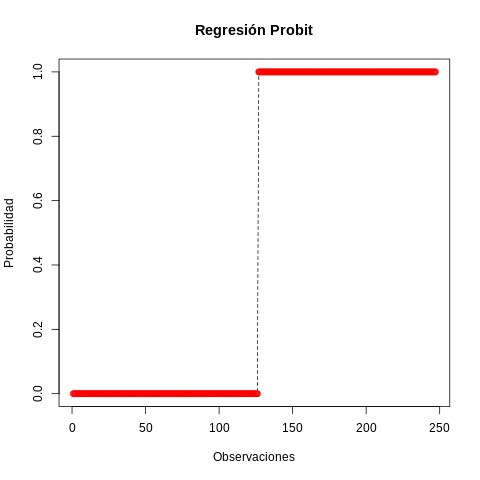

In [ ]:
%%R

ptol=0.5
yest=pnorm(xext%*%as.matrix(yprobr$coef),0,1)

#print(confusionMatrix(as.factor(y), as.factor(ylogr$fit)))
#matriz de confusión
print("Matriz de confusión")
print(table(y,ifelse(yest<0.5,0,1)))

plot(y,type="l", lty=2, xlab="Observaciones",
  ylab="Probabilidad", main="Regresión Probit")
points(yest, lwd=2, col=colors[1])


###### Ejercicio 1 Probit Python

###Ejemplo MLG (No binario)

In [ ]:
%%R
# La opción na.action nos permite indicar que debe hacer el modelo ante variables Nulas.
# Por defalut tiene na.fail el cual dará un error en el modelo,
# Se puede cambiar a na.omit si se desean omitir los valores *Nulos*

# La opción data permite incluir la base con las columnas que deseamos utilizar para hacer el modelo.

#  residuals()     Muestra los residuales
#  fitted()        Muestra la predicción despues de aplicar la inversa de la función liga
#  predict()       Muestra la predicción antes de aplicar la inversa de la función liga
#  Tambien es utilizado para predecir la variable respuesta (response) en nuevos datos

#  coefficients()  Muestra los coeficientes

#  deviance()      Muestra la devianza

#  formula()       Muestra la formula

#  summary()       Muestra el resumen

NULL


In [ ]:
%%R
#Identificar el punto de muestreo que no pertenece a la misma población
Peces <- read_excel("/content/AprendizMaquina/2023-1/Regresion/Datos/Baileyetal2008.xls",sheet = "AllData")
# summary(Peces) Para ver el nombre de las columnas originaes
# cambiamos el nombre:
colnames(Peces) <- c("Sitio","Num_Peces","Densidad","Profundidad","Año","Periodo","Xkm","Ykm","Superficie")
summary(Peces)

     Sitio          Num_Peces          Densidad          Profundidad  
 Min.   :  1.00   Min.   :   2.00   Min.   :1.476e-05   Min.   : 804  
 1st Qu.: 37.75   1st Qu.:  55.75   1st Qu.:7.772e-04   1st Qu.:1420  
 Median : 74.50   Median : 153.50   Median :2.624e-03   Median :2004  
 Mean   : 74.50   Mean   : 215.62   Mean   :4.689e-03   Mean   :2424  
 3rd Qu.:111.25   3rd Qu.: 279.75   3rd Qu.:6.489e-03   3rd Qu.:3524  
 Max.   :148.00   Max.   :1230.00   Max.   :3.092e-02   Max.   :4865  
      Año          Periodo          Xkm                Ykm           
 Min.   :1977   Min.   :1.000   Length:148         Length:148        
 1st Qu.:1980   1st Qu.:1.000   Class :character   Class :character  
 Median :1982   Median :1.000   Mode  :character   Mode  :character  
 Mean   :1988   Mean   :1.345                                        
 3rd Qu.:2001   3rd Qu.:2.000                                        
 Max.   :2002   Max.   :2.000                                        
   Superficie

In [ ]:
%%R
Peces

# A tibble: 148 x 9
   Sitio Num_Peces Densidad Profundidad   Año Periodo Xkm     Ykm     Superficie
   <dbl>     <dbl>    <dbl>       <dbl> <dbl>   <dbl> <chr>   <chr>        <dbl>
 1     1        76 0.00207          804  1978       1 98.755… -57.46…     36710 
 2     2       161 0.00352          808  2001       2 76.803… 178.64…     45741.
 3     3        39 0.000981         809  2001       2 103.79… -50.05…     39775 
 4     4       410 0.00804          848  1979       1 91.532… 146.44…     51000 
 5     5       177 0.00593          853  2002       2 107.14… -37.07…     29831.
 6     6       695 0.0218           960  1980       1 86.564… -48.19…     31880 
 7     7       352 0.00919          977  1981       1 84.217… -51.90…     38300 
 8     8       674 0.0176           982  1979       1 90.479… -66.73…     38260 
 9     9       624 0.0140           985  1982       1 -5.727… 203.91…     44600 
10    10       736 0.0140           986  1980       1 -4.585… 200.20…     52600 
# … with

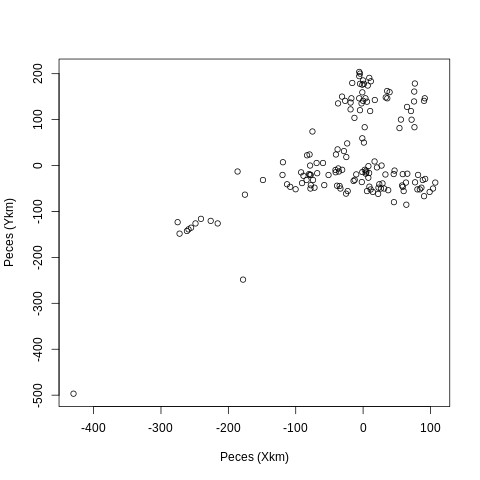

In [ ]:
%%R
plot(x = Peces$Xkm, y = Peces$Ykm,xlab = list("Peces (Xkm)", cex = 1), ylab = list("Peces (Ykm)", cex = 1))

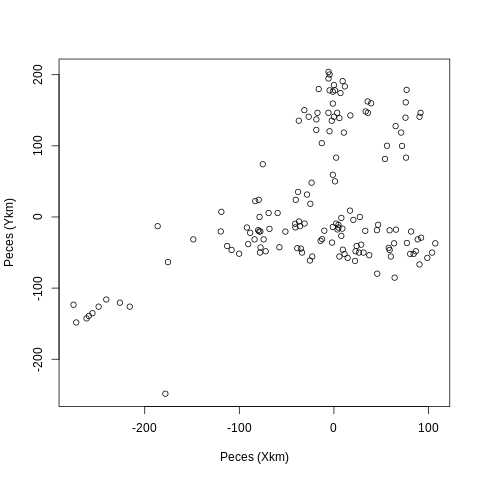

In [ ]:
%%R
#Eliminar variable extrema
Peces2 <- Peces[c(-136), ]  # Eliminamos el punto extremo
Peces <- Peces2             # Sobre escribimos la información original
rm(Peces2)                  # Eliminamos Peces2
Peces$Profundidad <- Peces$Profundidad/1000 #Dividimos columna Profundidad

plot(x = Peces$Xkm, y = Peces$Ykm, xlab = list("Peces (Xkm)", cex = 1), ylab = list("Peces (Ykm)", cex = 1))  # Gráficamos

In [ ]:
%%R
M0 <- lm(Num_Peces ~ Profundidad, data = Peces)
# La evaluamos
summary(M0)


Call:
lm(formula = Num_Peces ~ Profundidad, data = Peces)

Residuals:
    Min      1Q  Median      3Q     Max 
-333.05 -102.10  -14.79   45.96  895.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   450.48      33.14  13.592  < 2e-16 ***
Profundidad   -96.95      12.22  -7.932 5.32e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 184.4 on 145 degrees of freedom
Multiple R-squared:  0.3026,	Adjusted R-squared:  0.2978 
F-statistic: 62.92 on 1 and 145 DF,  p-value: 5.319e-13



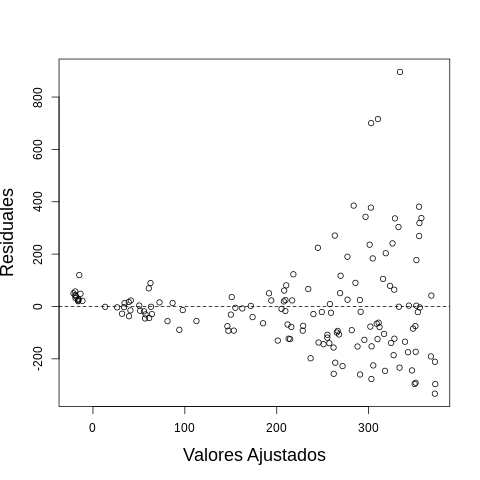

In [ ]:
%%R
#Prueba de homocedasticidad
E0 <- resid(M0)
F0 <- fitted(M0)
# Grafica Residuales vs Valores Ajustados
plot(x = F0, y = E0, xlab = "Valores Ajustados", ylab = "Residuales", cex.lab = 1.5)
abline(h = 0, lty = 2)

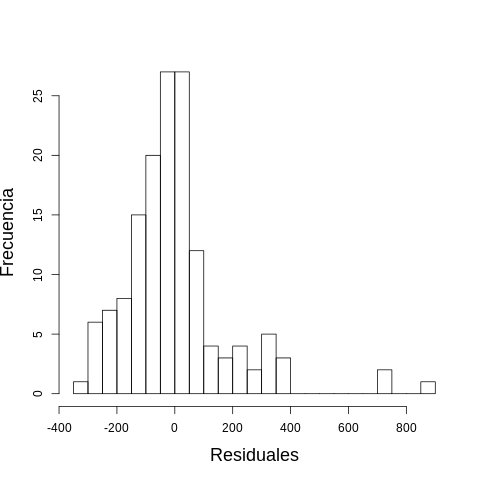

In [ ]:
%%R
#Histograma
hist(E0, main = "", breaks = 40, cex.lab = 1.5, xlab = "Residuales", ylab = "Frecuencia")

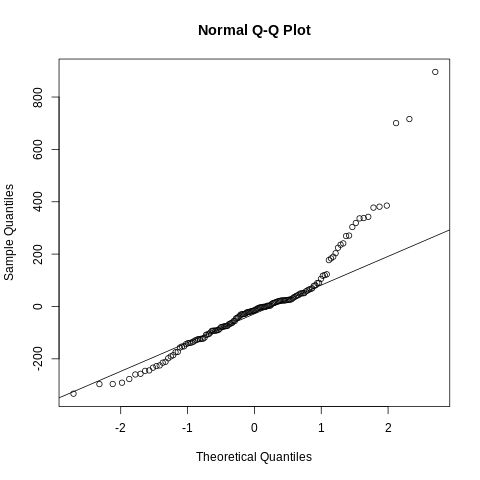

In [ ]:
%%R
#Residuales vs Teórico
#Gráfica Número de peces vs Profundidad Media
qqnorm(E0)
qqline(E0)

¿Cual es la diferencia entre Intervalos de Confianza e Intervalos de predicción?

Los “Intervalos de Confianza” se enfocan en las lineas de regresión y se interpreta como: “Si deseamos repetir la muestra X veces, la linea de regresión caerá dentro de ese intervalo en el 95% de las veces”

Los “Intervalos de Predicción” se enfocan en lo puntos individuales de los datos y se interpreta como: “Si deseamos repetir la muestra X veces en un punto particular de la variable explicativa, la variable respuesta caerá dentro de ese intervalo en el 95% de las veces”


Conclusiones Regresión Lineal

- El modelo espera que haya abundancias negativas, lo que es absurdo.
- El modelo predice valores negativos.
- Una transformación de la regresión podría corregir heterocedasticidad pero no valores negativos.
- La regresión de un modelo lineal generalizado con distribución - Poisson podría corrigir ambos problemas.

###### Ejercicio Python MLG

#### Ajuste con MLG

In [ ]:
%%R
d<-density(peces$Num_Peces)


Error in density(peces$Num_Peces) : object 'peces' not found


In [ ]:
%%R
## Modelo con distribución de Poisson
M1 <- glm(Num_Peces ~ Profundidad, data = Peces, family = poisson(link = "log"))
summary(M1)


Call:
glm(formula = Num_Peces ~ Profundidad, family = poisson(link = "log"), 
    data = Peces)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-25.455   -6.943   -3.117    4.408   35.788  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.630690   0.012639   524.6   <2e-16 ***
Profundidad -0.619669   0.006599   -93.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 27801  on 146  degrees of freedom
Residual deviance: 15860  on 145  degrees of freedom
AIC: 16838

Number of Fisher Scoring iterations: 5



In [ ]:
%%R
#Calculamos la r^2
r_2=1 - (deviance(M1)/M1$null.deviance)
r_2

[1] 0.4295029


In [ ]:
%%R
# El parámetro de sobredispersión se estima aproximadamente como
E1 <- residuals(M1, type="pearson")
n <- nrow(Peces)
p <- length(coef(M1))
Dispersion_M1 <- sum(E1^2/(n-p))
Dispersion_M1

[1] 115.45


In [ ]:
%%R
# La devianza permite hacer comparaciones de modelos, podemos comparar el modelo original (con Profundidad_Media) con el nulo (la media) lo que equivale a comprobar la significación del modelo en su conjunto:
M1.nulo <- glm(Num_Peces ~ 1, data = Peces, family = poisson)
anova(M1, M1.nulo, test = "Chisq")

Analysis of Deviance Table

Model 1: Num_Peces ~ Profundidad
Model 2: Num_Peces ~ 1
  Resid. Df Resid. Dev Df Deviance  Pr(>Chi)    
1       145      15860                          
2       146      27800 -1   -11940 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


La diferencia de devianzas es significativa (nos quedamos con el modelo más complejo)

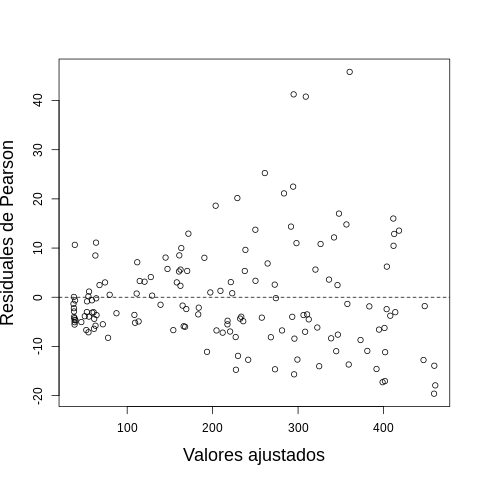

In [ ]:
%%R
# Extraemos los residuos y los valores ajustados
E1 <- resid(M1, type = "pearson")
F1 <- fitted(M1)
# Grafica Residuales vs Valores Ajustados
plot(x = F1, y = E1, xlab = "Valores ajustados",
     ylab = "Residuales de Pearson", cex.lab = 1.5)
abline(h = 0, v = 0, lty = 2)

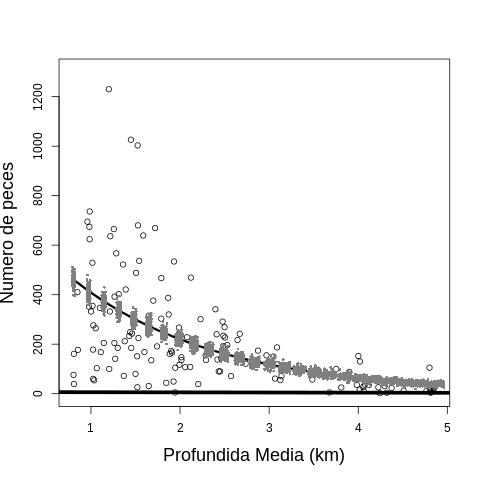

In [ ]:
%%R
plot(x = Peces$Profundidad, y = Peces$Num_Peces, ylim = c(0, 1300),
     xlab = "Profundida Media (km)",
     ylab = "Numero de peces", cex.lab = 1.5)
abline(M1, lwd = 5)
Nuevos_datos <- data.frame(Profundidad = seq(0.804, 4.865, length = 25))
P1 <- predict(M1, newdata = Nuevos_datos, type = "response")
lines(Nuevos_datos$Profundidad, P1, lwd = 3)
HL <- seq(0.804, 4.865, length = 25)
Beta <- coef(M1)
for (i in 1:25) {
    mu <- exp(Beta[1] + Beta[2] * HL[i])
    yi <- rpois(150, lambda = mu)
    points(jitter(rep(HL[i], 150)), jitter(yi), col = grey(0.5), pch = 16, cex = 0.5)
}

In [ ]:
%%R
Beta

(Intercept) Profundidad 
  6.6306905  -0.6196693 


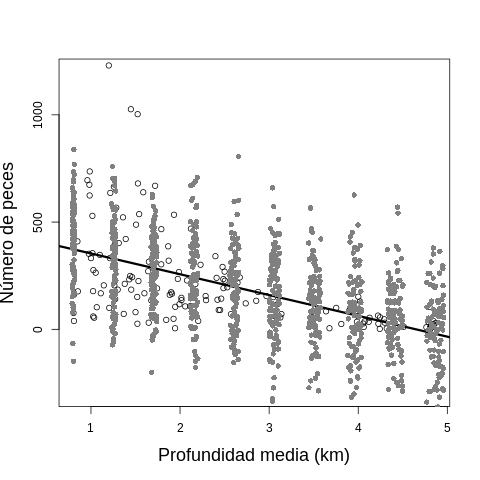

In [ ]:
%%R
plot(x = Peces$Profundidad, y = Peces$Num_Peces, xlab = "Profundidad media (km)",
     ylab = "Número de peces", cex.lab = 1.5, pch = 1, ylim = c(-300, 1200))
abline(M0, lwd = 3)
md <- seq(0.804, 4.865, length = 10)
Beta <- coef(M0)
for (i in 1:10) {
    mu <- Beta[1] + Beta[2] * md[i]
    yi <- rnorm(100, mean = mu, sd = summary(M0)$sigma)
    points(jitter(rep(md[i], 100)), jitter(yi), col = grey(0.5), pch = 16, cex = 1)
}

Conclusiones
- El modelo evita que existan abundancias negativas.
- El modelo ya no predice valores negativos, mejora la heterocedasticidad, pero puede mejorarse.
- La sobredispersión del modelo es de 115.6, puede ser una característica real de que se exija emplear otro tipo de modelos a consecuencia de:

  - Que falte una variable explicativa o la interacción entre algunas del modelo
  - Que existan valores extremos
  - Que alguna(s) variable explicativa(s) deban transformarse
  - Función vínculo incorrecta

La regresión de un modelo lineal generalizado con *Distribución Binomial Negativa* podría corrigir ambos problemas

##### Ejercicio Python MLG (Poisson)

#### Ejemplo R (Binomial Negativa)

In [ ]:
%%R
M2 <- glm.nb(Num_Peces ~ Profundidad, data = Peces) # Un modelo de BN para estos datos es:
summary(M2)


Call:
glm.nb(formula = Num_Peces ~ Profundidad, data = Peces, init.theta = 1.842849136, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1458  -0.8267  -0.3431   0.5218   2.1736  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.83490    0.13345   51.22   <2e-16 ***
Profundidad -0.72286    0.04963  -14.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(1.8428) family taken to be 1)

    Null deviance: 312.80  on 146  degrees of freedom
Residual deviance: 160.02  on 145  degrees of freedom
AIC: 1772.5

Number of Fisher Scoring iterations: 1


              Theta:  1.843 
          Std. Err.:  0.205 

 2 x log-likelihood:  -1766.491 


In [ ]:
%%R
E2 <- residuals(M2, type="pearson")
N <- nrow(Peces)
P <- length(coef(M2))+1 #+1 por k
Dispersion_M2 <- sum(E2^2/(N-P))
print(Dispersion_M2)
print(Dispersion_M1)

[1] 0.9273692
[1] 115.45


In [ ]:
%%R
AIC(M1,M2)

   df       AIC
M1  2 16838.437
M2  3  1772.491


¿Cuál de los dos modelos es mejor?

In [ ]:
%%R
#Significancia del modelo
anova(M1, M2, test = "Chisq")

Analysis of Deviance Table

Model 1: Num_Peces ~ Profundidad
Model 2: Num_Peces ~ Profundidad
  Resid. Df Resid. Dev Df Deviance Pr(>Chi)
1       145      15860                     
2       145        160  0    15700         


La diferencia de devianzas es significativa (nos quedamos con el modelo más complejo), que en este caso es la Binomial Negativa

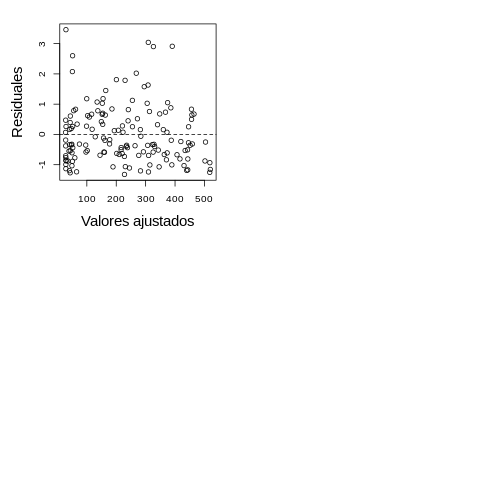

In [ ]:
%%R
par(mfrow = c(2, 2), mar = c(5, 5, 2, 2))
E2 <- resid(M2, type = "pearson")
F2 <- fitted(M2, type = "response")
plot(x = F2, y = E2, xlab = "Valores ajustados", ylab = "Residuales", cex.lab = 1.5)
abline(0, 0, lty = 2)

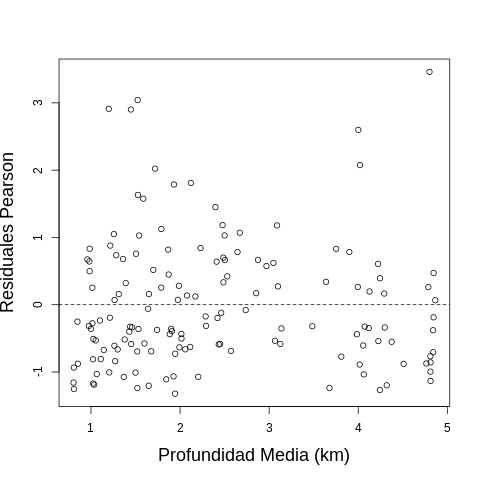

In [ ]:
%%R
plot(x = Peces$Profundidad, y = E2, xlab = "Profundidad Media (km)",
     ylab = "Residuales Pearson", cex.lab = 1.5)
abline(0, 0, lty = 2)

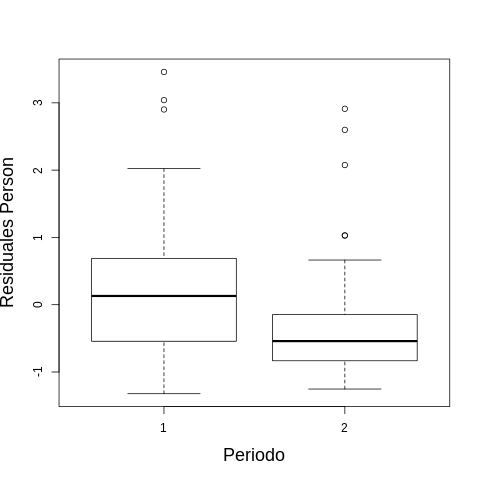

In [ ]:
%%R
boxplot(E2 ~ Periodo, data = Peces, xlab = "Periodo", ylab = "Residuales Person", cex.lab = 1.5)

Conclusiones
- El modelo presenta mejor comportamiento en AIC
- El modelo presenta mejor comportamiento en Deviance

Para este caso la sugerencia es utilizar el modelo Binomial Negativa, pues tiene mejora en ambos indicadores.

##### Ejercicio Python (Binomial Negativa)

Comparación de modelos Poisson y Bin Negativa Python

#### Regresión logística

In [ ]:
%%R
#A researcher is interested in how variables, such as GRE (Graduate Record Exam scores), GPA (grade point average)
#and prestige of the undergraduate institution, effect admission into graduate school.
#The response variable, admit/don’t admit, is a binary variable

data<- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
print(head(data))
print(summary(data))
print(sapply(data, sd))

print(xtabs(~admit + rank, data = data))
data$rank <- factor(data$rank)
mylogit <- glm(admit ~ gre + gpa + rank, data = data, family = binomial("logit"))
summary(mylogit)
print(confint(mylogit))


  admit gre  gpa rank
1     0 380 3.61    3
2     1 660 3.67    3
3     1 800 4.00    1
4     1 640 3.19    4
5     0 520 2.93    4
6     1 760 3.00    2
     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  
      admit         gre         gpa        rank 
  0.4660867 115.5165364   0.3805668   0.9444602 
     rank
admit  1  2  3  4
    0 28 97 93 55
    1 33 54 28 12
                    2.5 %       97.5 %
(Intercept) -6.2716202334 -1.792547080
gre          0.0001375921  0.004435874
gpa          0.1602959439  1.464142727
rank2       -1.3008888002 -0.056745722
rank3       -2.0276713127 -

In [ ]:
%%R
wald.test(b = coef(mylogit), Sigma = vcov(mylogit), Terms = 4:6)

Wald test:
----------

Chi-squared test:
X2 = 20.9, df = 3, P(> X2) = 0.00011


In [ ]:
%%R
## odds ratios and 95% CI
exp(cbind(OR = coef(mylogit), confint(mylogit)))

                   OR       2.5 %    97.5 %
(Intercept) 0.0185001 0.001889165 0.1665354
gre         1.0022670 1.000137602 1.0044457
gpa         2.2345448 1.173858216 4.3238349
rank2       0.5089310 0.272289674 0.9448343
rank3       0.2617923 0.131641717 0.5115181
rank4       0.2119375 0.090715546 0.4706961


### Backtesting o contraste de los modelos de regresión

#### Ejemplo R con los 3 conjuntos y validación cruzada

In [ ]:
%%R
diamantes <- diamonds # Guardamos los datos
print(summary(diamantes))
# Cambiamos el nombre de las columnas por:
colnames(diamantes) <- c("Kilate","Corte","Color","Claridad","Profundidad","Longitud", "Precio",
  "x","y","z")
print(summary(diamantes))

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

In [ ]:
%%R
set.seed(100)
d <- diamantes[sample(nrow(diamantes), 1000), ]


In [ ]:
%%R
plot_ly(d, x = ~Kilate, y = ~Precio, Color = ~Kilate, size = ~Kilate, text = ~paste("Claridad: ", Claridad))

In [ ]:
%%R
# Ajuste del modelo "lm""
modelo <- lm(Precio ~ ., diamantes)

# Predicción de los datos
p <- predict(modelo, diamantes)

# Calcular el error
error <- p - diamantes[["Precio"]]

# Calcula el RMSE
 RMSE <- sqrt(mean(error^2))
 RMSE

[1] 1129.843


#### ¿Como validar si un modelo se comporta bien al incorporar nuevos datos?

Una manera para validar si un modelo se comporta bien al incorporar datos nuevos, es dividir el dataset en dos conjuntos:

*   Conjunto de entrenamiento: Datos historicos con el que vamos a ajustar el modelo
*   Conjunto de prueba: Datos históricos con el que vamos a probar el modelo






In [ ]:
%%R
set.seed(42)
# Barajeamos de manera aleatoria los indices de los renglones
renglones <- sample(nrow(diamantes))
# De forma aleatoria reordenamos los datos
diamantes2 <- diamantes[renglones, ]
# Comparamos los datos originales vs los datos aleatorios
head(diamantes)

# Paso 1. Fijamos la variable de división de 80% en los datos
 division <- round(nrow(diamantes2) * .80)

#Paso 2. Tomamos el 80% de los datos como: Datos prueba
 prueba <- diamantes2[1:division, ]
 nrow(prueba)

[1] 43152


In [ ]:
%%R
#Paso 3. Tomamos el 20% de los datos como: Datos test
 test <- diamantes2[(division + 1):nrow(diamantes2), ]
 nrow(test)

[1] 10788


In [ ]:
 %%R
 modelo <- lm(Precio ~ ., prueba)

# Predicción de los datos
 p <- predict(modelo,test)

# Calcular el error
 error <- p - test[["Precio"]]

# Calcula el RMSE2
 RMSE2 <- sqrt(mean(error^2))

In [ ]:
%%R
print(RMSE)
print(RMSE2)

[1] 1129.843
[1] 1137.466


Uno de los problemas de dividir la tabla historica una unica vez en datos tipo prueba y test, es que el RMSE resultante podría presentar una alta variabilidad entre las distintas formas de agrupar estos datos de forma aleatoria.

Para resolver este problema se utiliza una técnica denominada validación cruzada “CV”, que consiste en agrupar los resultados obtenidos del RMSE de diferentes combinaciones aleatorias para agrupa datos prueba y test. De esta forma se obtiene la media para obtener el RMSE final.

En este ejemplo, los datos fueron divididos o agrupados en 5 particiones iguales.

Durante el primer ajuste del modelo, el 20% de los datos (primer grupo) son considerados como test y el 80% restante (los siguientes 4 grupos) son considerados como los datos entrenamiento (training)

El modelo ajusta el modelo K veces de acuerdo a las diversas formas de seleccionar la proporción entrenamiento / prueba del modelo. Por tanto el error de predicción del modelo para cada ajuste son promediados para obtener la predicción estadistica para el modelo.

La elección del numero de grupos K se debe explorar, sin embargo 5 o 10 grupos son los usualmente utilizados. Generalmente, entre menor sea el numero de agrupaciones, menos sera la varianza y mayor el error de estimación y viceversa.

In [ ]:
%%R
modelo <- train(
  Precio ~ ., diamantes,
  method = "lm",
  trControl = trainControl(
    method = "cv", number = 10,
    verboseIter = TRUE
  )
)


+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


In [ ]:
%%R
modelo

Linear Regression 

53940 samples
    9 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 48547, 48546, 48546, 48547, 48545, 48547, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1131.015  0.9196398  740.6117

Tuning parameter 'intercept' was held constant at a value of TRUE


##### Ejercicio 3 en Python 3 conjuntos y validación cruzada

### Ejemplo con entrenamiento de clasificación en R

Los siguientes datos utilizados por [Gorman and Sejnowski] contienen información de CLASIFICACION de dos tipos de objetos: R si se trata de una roca o M si se trata de un metal.

Cada columna contiene 60 elementos que van del 0 al 1. Cada columna representa mediciones de distintas bandas de frecuencias, las cuales permiten clasificar los objetos en una columna adicional por R o M.

La tabla “Sonar” puede descargarse mediante la paqueteria mlbench y contiene 208 observaciones.

In [ ]:
install.packages("mlbench")
library(mlbench)

In [ ]:
%%R
data(Sonar)
summary(Sonar)

    Cliente          Incump           Liquid          Apalanc       
 Min.   :  1.0   Min.   :0.0000   Min.   :0.1857   Min.   :-0.2037  
 1st Qu.: 62.5   1st Qu.:0.0000   1st Qu.:0.7116   1st Qu.: 0.5251  
 Median :124.0   Median :0.0000   Median :0.9467   Median : 0.8554  
 Mean   :124.0   Mean   :0.4899   Mean   :0.9342   Mean   : 0.9616  
 3rd Qu.:185.5   3rd Qu.:1.0000   3rd Qu.:1.1673   3rd Qu.: 1.4641  
 Max.   :247.0   Max.   :1.0000   Max.   :1.5578   Max.   : 2.0198  
     AscCl             Rentab             Bancos          PCP_CT      
 Min.   :0.02417   Min.   :-0.06483   Min.   :1.000   Min.   :0.2069  
 1st Qu.:3.88558   1st Qu.: 0.01140   1st Qu.:2.000   1st Qu.:0.7267  
 Median :5.14645   Median : 0.04660   Median :3.000   Median :1.1368  
 Mean   :4.74820   Mean   : 0.03796   Mean   :2.636   Mean   :1.0954  
 3rd Qu.:6.08285   3rd Qu.: 0.07108   3rd Qu.:3.000   3rd Qu.:1.4321  
 Max.   :8.89808   Max.   : 0.11289   Max.   :4.000   Max.   :1.8536  
     Gop_SD         

In [ ]:
%%R
# Fijamos la semilla aleatoria de los datos
set.seed(42)
# Barajeamos de manera aleatoria los indices de los renglones
renglones <- sample(nrow(Sonar))
# De forma aleatoria reordenamos los datos
Sonar2 <- Sonar[renglones, ]
# Comparamos los datos originales vs los datos aleatorios
head(Sonar)

      V1     V2     V3     V4     V5     V6     V7     V8     V9    V10    V11
1 0.0200 0.0371 0.0428 0.0207 0.0954 0.0986 0.1539 0.1601 0.3109 0.2111 0.1609
2 0.0453 0.0523 0.0843 0.0689 0.1183 0.2583 0.2156 0.3481 0.3337 0.2872 0.4918
3 0.0262 0.0582 0.1099 0.1083 0.0974 0.2280 0.2431 0.3771 0.5598 0.6194 0.6333
4 0.0100 0.0171 0.0623 0.0205 0.0205 0.0368 0.1098 0.1276 0.0598 0.1264 0.0881
5 0.0762 0.0666 0.0481 0.0394 0.0590 0.0649 0.1209 0.2467 0.3564 0.4459 0.4152
6 0.0286 0.0453 0.0277 0.0174 0.0384 0.0990 0.1201 0.1833 0.2105 0.3039 0.2988
     V12    V13    V14    V15    V16    V17    V18    V19    V20    V21    V22
1 0.1582 0.2238 0.0645 0.0660 0.2273 0.3100 0.2999 0.5078 0.4797 0.5783 0.5071
2 0.6552 0.6919 0.7797 0.7464 0.9444 1.0000 0.8874 0.8024 0.7818 0.5212 0.4052
3 0.7060 0.5544 0.5320 0.6479 0.6931 0.6759 0.7551 0.8929 0.8619 0.7974 0.6737
4 0.1992 0.0184 0.2261 0.1729 0.2131 0.0693 0.2281 0.4060 0.3973 0.2741 0.3690
5 0.3952 0.4256 0.4135 0.4528 0.5326 0.7306 0.6193 0

In [ ]:
%%R
#Paso 1. Fijamos la variable de división de 60% en los datos
 division <- round(nrow(Sonar2) * .60)

#Paso 2. Tomamos el 60% de los datos como: Datos prueba
 prueba <- Sonar2[1:division, ]
nrow(prueba)

[1] 125


In [ ]:
%%R
#Paso 3. Tomamos el 40% de los datos como: Datos test
 test <- Sonar2[(division + 1):nrow(Sonar2), ]
 nrow(test)

[1] 83


In [ ]:
%%R
# Ajuste del modelo "glm""
 modelo <- glm(Class ~ .,family ="binomial", prueba)

# Predicción de los datos
 p <- predict(modelo,test, type="response")

In [ ]:
%%R
p_class <-
  ifelse(p > 0.50,
         "M",
         "R"
  )

#Paso 2. Crea la matriz de Confusion
table(p_class, test[["Class"]])

       
p_class  M  R
      M  9 24
      R 32 18


             [,1]
M vs. R 0.6936702


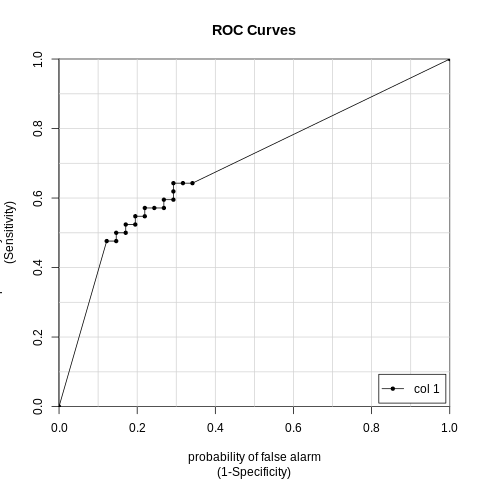

In [ ]:
%%R
#Calculamos  la  curva  del  ROC

colAUC(p,  test[["Class"]],  plotROC  =  TRUE)

In [ ]:
%%R
Control  <-trainControl(method  =  "cv",number  =  10,summaryFunction  =  twoClassSummary,classProbs  =  TRUE,verboseIter  =  TRUE)

In [ ]:
%%R
modelo  <-train(Class  ~  .,  Sonar,  method  =  "glm",trControl  =  Control)

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


In [ ]:
%%R
modelo

Generalized Linear Model 

208 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 187, 187, 188, 188, 187, 188, ... 
Resampling results:

  ROC       Sens       Spec     
  0.737096  0.7643939  0.6644444



#### Ejercicio MLG Python

Pasar la sonar a Python